# Disease Label Distribution Analysis
This notebook analyzes the distribution of disease labels in the training dataset.



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import os

# Ensure that the processed training data exists
train_path = "../data/processed/train.jsonl"
assert os.path.exists(train_path), "Processed training data not found."

# Load the processed training data
with open(train_path, "r") as f:
    train_data = [json.loads(line) for line in f]

## Basic Information

In [11]:
print(f"Number of training samples: {len(train_data)}")
print("Example record:", train_data[0])


Number of training samples: 64
Example record: {'id': 472, 'positive_phenotypes': ['HP:0001332', 'HP:0000365'], 'all_candidate_genes': ['ENSG00000146648', 'ENSG00000133703'], 'true_diseases': 1, 'clinical_vec': [0.7416556816, 0.0684509235, 0.2484346044, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]}


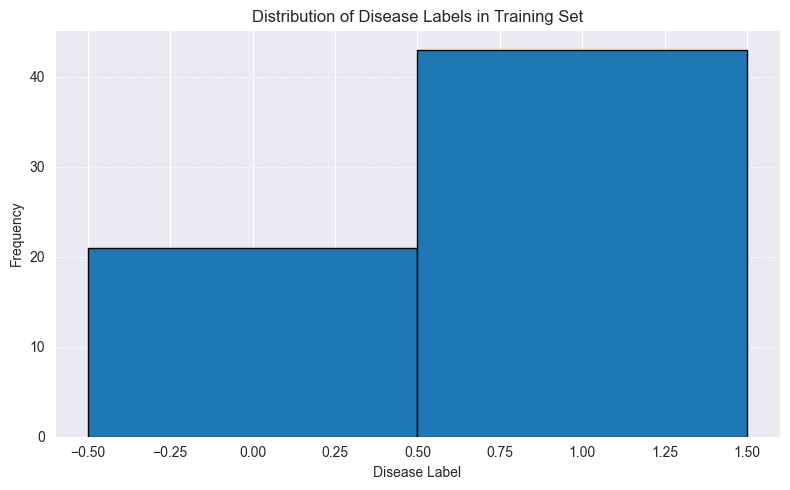

In [12]:
labels = [rec["true_diseases"] for rec in train_data]
plt.figure(figsize=(8,5))
plt.hist(labels, bins=range(min(labels), max(labels) + 2), align='left', edgecolor='black')
plt.title("Distribution of Disease Labels in Training Set")
plt.xlabel("Disease Label")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Phenotype Analysis

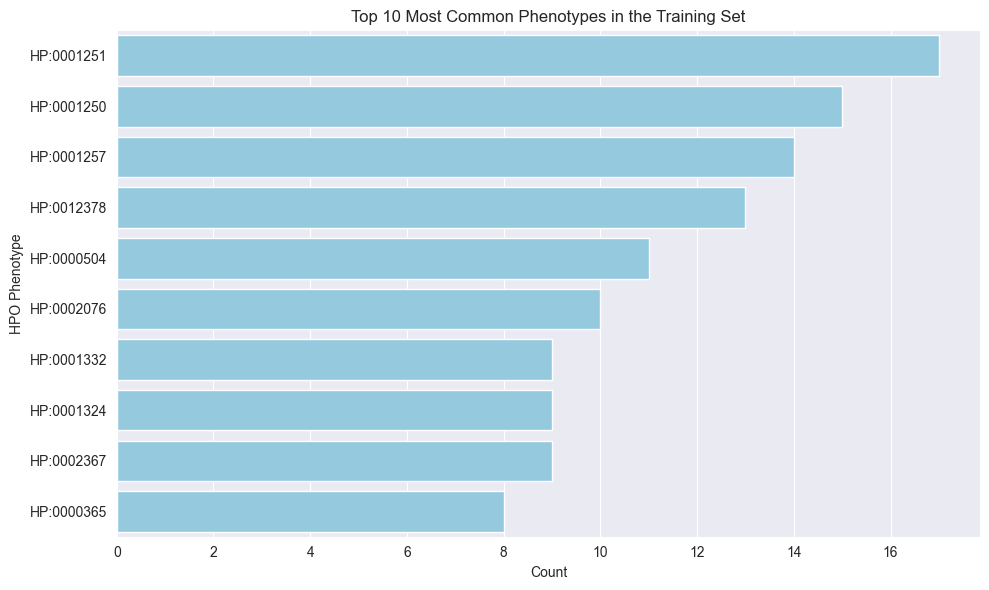

In [13]:
phenotype_lists = [rec["positive_phenotypes"] for rec in train_data]
phenotype_counts = Counter([ph for sublist in phenotype_lists for ph in sublist])
top_10_phenos = phenotype_counts.most_common(10)

ph_labels, ph_vals = zip(*top_10_phenos)
plt.figure(figsize=(10,6))
sns.barplot(x=ph_vals, y=ph_labels, color="skyblue")
plt.title("Top 10 Most Common Phenotypes in the Training Set")
plt.xlabel("Count")
plt.ylabel("HPO Phenotype")
plt.tight_layout()
plt.show()


## Gene Analysis

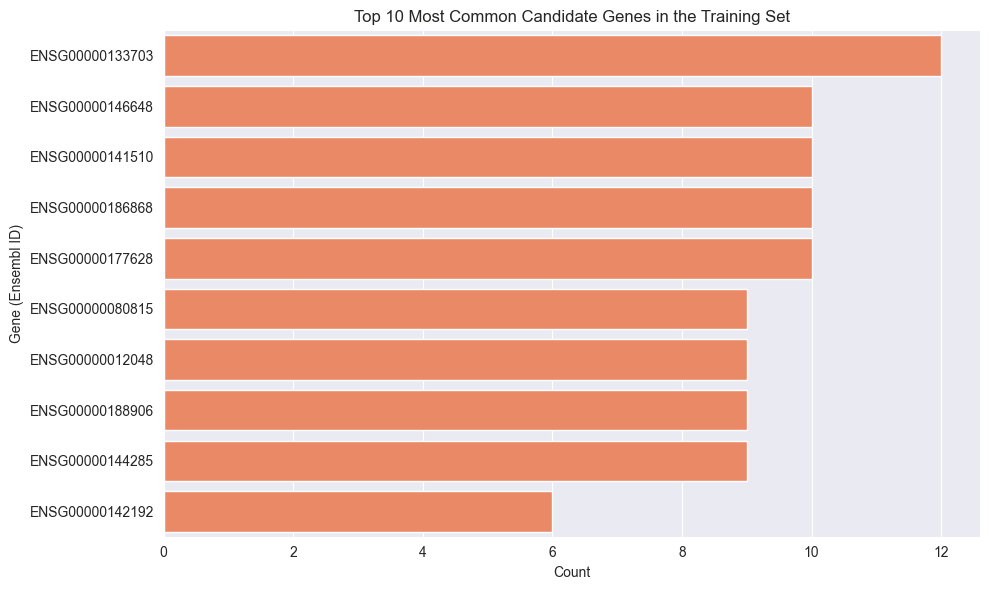

In [14]:
gene_lists = [rec["all_candidate_genes"] for rec in train_data]
gene_counts = Counter([g for sublist in gene_lists for g in sublist])
top_10_genes = gene_counts.most_common(10)

g_labels, g_vals = zip(*top_10_genes)
plt.figure(figsize=(10,6))
sns.barplot(x=g_vals, y=g_labels, color="coral")
plt.title("Top 10 Most Common Candidate Genes in the Training Set")
plt.xlabel("Count")
plt.ylabel("Gene (Ensembl ID)")
plt.tight_layout()
plt.show()

## Distribution of Phenotypes in Diseased vs. Non-Diseased 

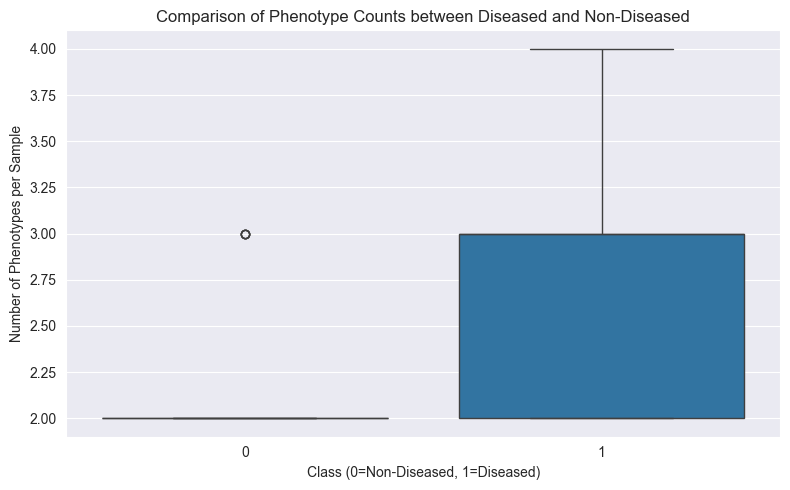

In [15]:
y_values = [1 if rec["true_diseases"] != 0 else 0 for rec in train_data]
phenotype_counts_per_sample = [len(rec["positive_phenotypes"]) for rec in train_data]
df_analysis = pd.DataFrame({"Diseased": y_values, "Num_Phenotypes": phenotype_counts_per_sample})

plt.figure(figsize=(8,5))
sns.boxplot(x='Diseased', y='Num_Phenotypes', data=df_analysis)
plt.title("Comparison of Phenotype Counts between Diseased and Non-Diseased")
plt.xlabel("Class (0=Non-Diseased, 1=Diseased)")
plt.ylabel("Number of Phenotypes per Sample")
plt.tight_layout()
plt.show()

## Missing Data Checks

In [16]:
missing_phenotypes = sum(1 for rec in train_data if not rec["positive_phenotypes"])
missing_genes = sum(1 for rec in train_data if not rec["all_candidate_genes"])
print(f"{missing_phenotypes} samples have no phenotypes listed.")
print(f"{missing_genes} samples have no genes listed.")

0 samples have no phenotypes listed.
0 samples have no genes listed.
